In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def sample_image(image, factor):
    """
    Downsamples the image by the given factor.
    Args:
        image (numpy array): Original image.
        factor (int): Factor by which to downsample.
    Returns:
        numpy array: Downsampled image.
    """
    height, width = image.shape[:2]
    sampled_image = cv2.resize(image, (width // factor, height // factor), interpolation=cv2.INTER_NEAREST)
    return sampled_image

def quantize_image(image, levels):
    """
    Reduces the number of grayscale levels in the image.
    Args:
        image (numpy array): Original image.
        levels (int): Number of grayscale levels.
    Returns:
        numpy array: Quantized image.
    """
    quantized_image = np.floor(image / (256 // levels)) * (256 // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image

def plot_images(original, sampled, quantized):
    """
    Plots the original, sampled, and quantized images side by side.
    Args:
        original (numpy array): Original image.
        sampled (numpy array): Sampled image.
        quantized (numpy array): Quantized image.
    """
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')

    plt.show()


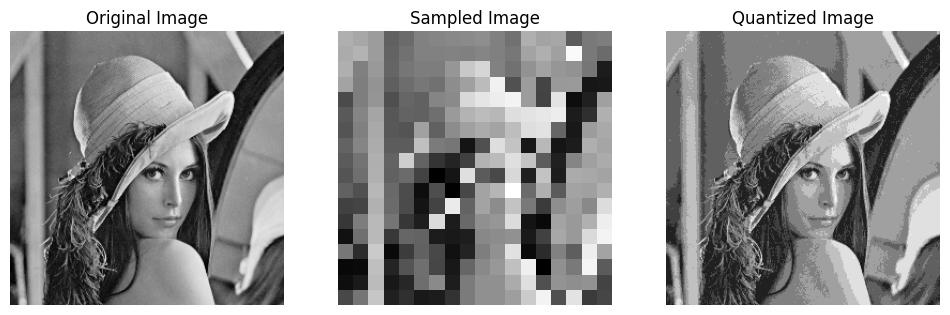

In [6]:
image_path='images/lena_gray_256.tif'
sampling_factor=14
quantization_levels=9

# Load image in grayscale
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    print(f"Error: Unable to load image at {image_path}")

# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)
quantized_image = quantize_image(original_image, quantization_levels)

# Plot results
plot_images(original_image, sampled_image, quantized_image)


In [17]:
from PIL import Image
img1=Image.open('images/lena_gray_256.tif')
img2=Image.open ('images/cameraman.tif')

resize=(400,400)
img1=img1.resize(resize,Image.Resampling.LANCZOS)
img2=img2.resize(resize,Image.Resampling.LANCZOS)

im1arr=np.asarray(img1)
im2arr=np.asarray(img2)

addition=im1arr+im2arr
resultImage=Image.fromarray(addition)
resultImage.show()

#Sets and Logical Operations

img3=Image.open('images/A.png')
img3.show()
img4=Image.open('images/B.png')
img4.show()

resize=(400,400)
img3=img3.resize(resize,Image.Resampling.LANCZOS)
img4=img4.resize(resize,Image.Resampling.LANCZOS)
# img3 = img3.convert("L")
# img4 = img4.convert("L")

im3arr=np.asarray(img3)
im4arr=np.asarray(img4)

union=im4arr|im3arr
resultImage2=Image.fromarray(union)
resultImage2.show() 


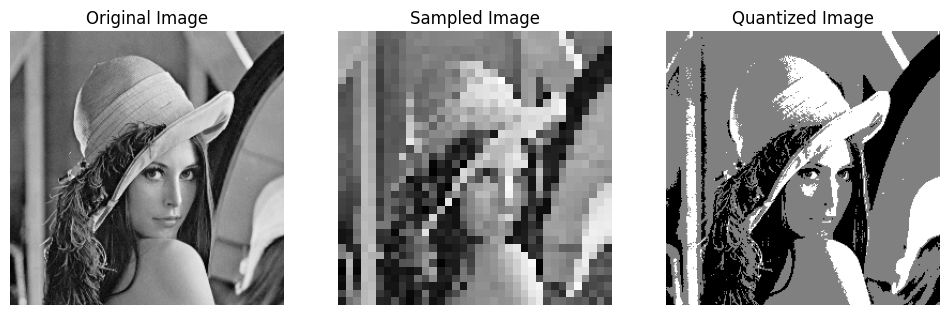

In [14]:
#task 1
sampling_factor=7
quantization_levels=3

# Load image in grayscale
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    print(f"Error: Unable to load image at {image_path}")

# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)
quantized_image = quantize_image(original_image, quantization_levels)

# Plot results
plot_images(original_image, sampled_image, quantized_image)

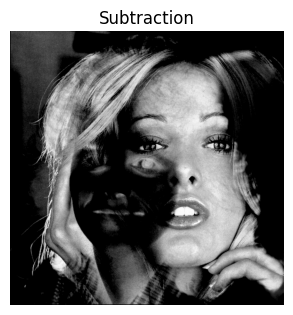

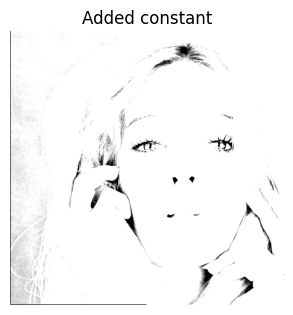

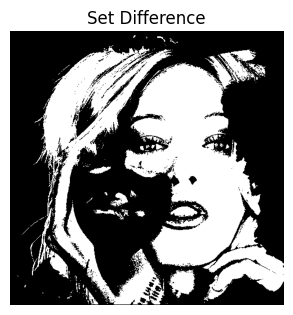

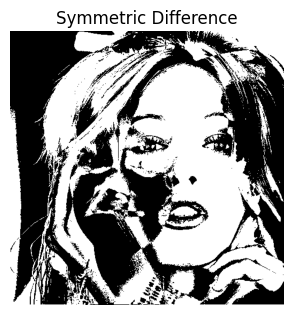

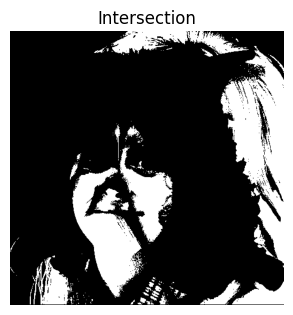

In [16]:
#task 2
def displayIm(imageD, title): 
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(imageD, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

t21 = cv2.imread("images/woman_blonde.tif", cv2.IMREAD_GRAYSCALE)
t22 = cv2.imread("images/woman_darkhair.tif", cv2.IMREAD_GRAYSCALE)
imt2arr = np.asarray(t21)
imt2arr2 = np.asarray(t22)

subResult = cv2.subtract(imt2arr,imt2arr2)
displayIm(subResult, "Subtraction")
AddCon = cv2.add(imt2arr,175)
displayIm(AddCon, "Added constant")
_, bin1 = cv2.threshold(imt2arr, 128, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(imt2arr2, 128, 255, cv2.THRESH_BINARY)

setDifference = cv2.bitwise_and(bin1, cv2.bitwise_not(bin2))
displayIm(setDifference, "Set Difference")

symDifference = cv2.bitwise_xor(bin1, bin2)
displayIm(symDifference, "Symmetric Difference")

intersection = cv2.bitwise_and(bin1, bin2)
displayIm(intersection, "Intersection")

